In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
raw_data = pd.read_csv('data.csv')

In [59]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 9144 non-null   object
 1   Price                 30360 non-null  object
 2   Address               30360 non-null  object
 3   Price per m2          12 non-null     object
 4   Area                  30358 non-null  object
 5   Bedrooms              20632 non-null  object
 6   Toilets               19720 non-null  object
 7   Published At          30360 non-null  object
 8   Diện tích             30358 non-null  object
 9   Mức giá               30360 non-null  object
 10  Hướng nhà             7640 non-null   object
 11  Hướng ban công        4677 non-null   object
 12  Ngày đăng             30360 non-null  object
 13  Ngày hết hạn          30360 non-null  object
 14  Loại tin              30360 non-null  object
 15  Mã tin                30360 non-null

In [60]:
unduplicated_data = raw_data.drop_duplicates(subset=['Mã tin'], keep='first')
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12446 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 3838 non-null   object
 1   Price                 12446 non-null  object
 2   Address               12446 non-null  object
 3   Price per m2          1 non-null      object
 4   Area                  12445 non-null  object
 5   Bedrooms              8202 non-null   object
 6   Toilets               7805 non-null   object
 7   Published At          12446 non-null  object
 8   Diện tích             12445 non-null  object
 9   Mức giá               12446 non-null  object
 10  Hướng nhà             3131 non-null   object
 11  Hướng ban công        1828 non-null   object
 12  Ngày đăng             12446 non-null  object
 13  Ngày hết hạn          12446 non-null  object
 14  Loại tin              12446 non-null  object
 15  Mã tin                12446 non-null  obj

In [61]:
unduplicated_data = unduplicated_data.drop(["Price per m2","Project Address", "Title", "Diện tích", "Mức giá", "Project Title", "Ngày hết hạn", "Number of Buildings", "Ngày đăng", "Mã tin"], axis="columns")
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12446 entries, 0 to 30359
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 12446 non-null  object
 1   Address               12446 non-null  object
 2   Area                  12445 non-null  object
 3   Bedrooms              8202 non-null   object
 4   Toilets               7805 non-null   object
 5   Published At          12446 non-null  object
 6   Hướng nhà             3131 non-null   object
 7   Hướng ban công        1828 non-null   object
 8   Loại tin              12446 non-null  object
 9   Status                3838 non-null   object
 10  Number of Apartments  3838 non-null   object
 11  Developer             3838 non-null   object
dtypes: object(12)
memory usage: 1.2+ MB


In [62]:
# unduplicated_data_2.head(30)
unduplicated_data = unduplicated_data[unduplicated_data["Price"] != "Thỏa thuận"]
unduplicated_data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 11508 entries, 0 to 30359
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 11508 non-null  object
 1   Address               11508 non-null  object
 2   Area                  11507 non-null  object
 3   Bedrooms              7567 non-null   object
 4   Toilets               7208 non-null   object
 5   Published At          11508 non-null  object
 6   Hướng nhà             2957 non-null   object
 7   Hướng ban công        1725 non-null   object
 8   Loại tin              11508 non-null  object
 9   Status                3606 non-null   object
 10  Number of Apartments  3606 non-null   object
 11  Developer             3606 non-null   object
dtypes: object(12)
memory usage: 1.1+ MB


In [63]:
unduplicated_data.head(10)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương
6,"7,8 tỷ","Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100 m²,3 phòng,3 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN
7,"5,95 tỷ","Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87 m²,3 phòng,2 phòng,15/10/2024,NaN,NaN,Tin thường,Đã bàn giao,47-112 m²,Novaland Group
9,16 tỷ,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156 m²,8 phòng,9 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN
10,"8,6 tỷ","Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34 m²,3 phòng,4 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN
11,"8,7 tỷ","Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80 m²,4 phòng,5 phòng,04/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN


In [64]:
# Chuyển đổi dữ liệu ở cột Area sang float
def convert_area_value(value):
    try: 
        # Chỉ thực hiện thay thế nếu value là chuỗi
        if isinstance(value, str):
            # Lọc bỏ các dấu chấm ở số hàng nghìn
            value = value.replace('m²', '').replace('.', '')

            # Thay dấu phẩy thành dấu chấm
            value = value.replace(',', '.')
            
            return float(value)
        
        # Nếu value đã là số (float hoặc int), trả về trực tiếp
        elif isinstance(value, (int, float)):
            return float(value)

    except Exception as e:
        print(f"Lỗi khi xử lý giá trị: {value}. Chi tiết lỗi: {e}")
        return None

unduplicated_data['Diện Tích'] = unduplicated_data['Area'].apply(convert_area_value)

Lỗi khi xử lý giá trị: Area. Chi tiết lỗi: could not convert string to float: 'Area'


In [65]:
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11508 entries, 0 to 30359
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 11508 non-null  object 
 1   Address               11508 non-null  object 
 2   Area                  11507 non-null  object 
 3   Bedrooms              7567 non-null   object 
 4   Toilets               7208 non-null   object 
 5   Published At          11508 non-null  object 
 6   Hướng nhà             2957 non-null   object 
 7   Hướng ban công        1725 non-null   object 
 8   Loại tin              11508 non-null  object 
 9   Status                3606 non-null   object 
 10  Number of Apartments  3606 non-null   object 
 11  Developer             3606 non-null   object 
 12  Diện Tích             11506 non-null  float64
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [66]:
# Hàm chuyển đổi giá trị thành tỷ với xử lý trường hợp "triệu/m²"
def convert_to_billion(value, area):
    try:
        # Chỉ thực hiện thay thế nếu value là chuỗi
        if isinstance(value, str):
            # Thay dấu phẩy thành dấu chấm
            value = value.replace(',', '.')

            # Dữ liệu chỉ đánh giá các bds rao bán nên sẽ không xử lý các bds cho thuê
            if '/tháng' in value:
                return None
            
            # Kiểm tra nếu có "triệu/m²"
            elif 'triệu/m²' in value:
                price_per_sqm = float(value.replace(' triệu/m²', '')) / 1000  # Đổi từ triệu/m² thành tỷ/m²
                return price_per_sqm * area  # Nhân với diện tích để có giá trị tổng

            # Kiểm tra nếu có "triệu/m²"
            elif 'tỷ/m²' in value:
                price_per_sqm = float(value.replace(' tỷ/m²', ''))
                return price_per_sqm * area  # Nhân với diện tích để có giá trị tổng

            # Xử lý các trường hợp có đơn vị "tỷ" hoặc "triệu"
            elif 'tỷ' in value:
                return float(value.replace(' tỷ', ''))
            
            # Chuyển "triệu" thành "tỷ"
            elif 'triệu' in value:
                return float(value.replace(' triệu', '')) / 1000  
        
        # Nếu value đã là số (float hoặc int), trả về trực tiếp
        elif isinstance(value, (int, float)):
            return float(value)
        
        return None
        
    except Exception as e:
        print(f"Lỗi khi xử lý giá trị: {value}. Chi tiết lỗi: {e}")
        return None

# Áp dụng hàm vào cột 'giá_cả' và truyền thêm cột 'diện_tích' để tính giá trị cuối cùng
unduplicated_data['Giá'] = unduplicated_data.apply(lambda row: convert_to_billion(row['Price'], row['Diện Tích']), axis=1)

In [67]:
unduplicated_data = unduplicated_data.dropna(subset=["Giá"])
unduplicated_data.head()

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer,Diện Tích,Giá
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN,40.0,15.20
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,90.0,5.60
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô,87.0,7.00
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN,60.0,12.35
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương,57.0,1.35


In [68]:
unduplicated_data["Triệu/m2"] = (unduplicated_data["Giá"] / unduplicated_data["Diện Tích"] * 100).round(1)
unduplicated_data.head(10)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer,Diện Tích,Giá,Triệu/m2
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN,40.0,15.20,38.0
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,90.0,5.60,6.2
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô,87.0,7.00,8.0
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN,60.0,12.35,20.6
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương,57.0,1.35,2.4
6,"7,8 tỷ","Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100 m²,3 phòng,3 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN,100.0,7.80,7.8
7,"5,95 tỷ","Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87 m²,3 phòng,2 phòng,15/10/2024,NaN,NaN,Tin thường,Đã bàn giao,47-112 m²,Novaland Group,87.0,5.95,6.8
9,16 tỷ,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156 m²,8 phòng,9 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN,156.0,16.00,10.3
10,"8,6 tỷ","Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34 m²,3 phòng,4 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN,34.0,8.60,25.3
11,"8,7 tỷ","Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80 m²,4 phòng,5 phòng,04/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN,80.0,8.70,10.9


In [69]:
unduplicated_data["Ngày đăng"] = pd.to_datetime(unduplicated_data["Published At"], format="%d/%m/%Y")
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11498 entries, 0 to 30359
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Price                 11498 non-null  object        
 1   Address               11498 non-null  object        
 2   Area                  11498 non-null  object        
 3   Bedrooms              7559 non-null   object        
 4   Toilets               7200 non-null   object        
 5   Published At          11498 non-null  object        
 6   Hướng nhà             2956 non-null   object        
 7   Hướng ban công        1723 non-null   object        
 8   Loại tin              11498 non-null  object        
 9   Status                3601 non-null   object        
 10  Number of Apartments  3601 non-null   object        
 11  Developer             3601 non-null   object        
 12  Diện Tích             11498 non-null  float64       
 13  Giá                  

In [70]:
def convert_the_number_of_rooms(value):
    try:
        if isinstance(value, str):
            if "phòng" in value:
                value = value.replace(" phòng", "")
                return float(value)
            else: return None
        elif isinstance (value, (int, float)):
            return float(value)
        return None
    except Exception as e:
        print(f"Lỗi khi xử lý giá trị {value}, chi tiết lỗi {e}")
        return None
    
unduplicated_data["Số Phòng Ngủ"] = unduplicated_data["Bedrooms"].apply(convert_the_number_of_rooms)
unduplicated_data["Số Nhà Vệ Sinh"] = unduplicated_data["Toilets"].apply(convert_the_number_of_rooms)

In [71]:
# unduplicated_data.head(10)
unduplicated_data.head(10)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer,Diện Tích,Giá,Triệu/m2,Ngày đăng,Số Phòng Ngủ,Số Nhà Vệ Sinh
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN,40.0,15.20,38.0,2024-10-17,6.0,4.0
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,90.0,5.60,6.2,2024-10-23,3.0,2.0
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô,87.0,7.00,8.0,2024-10-23,2.0,2.0
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN,60.0,12.35,20.6,2024-10-22,4.0,NaN
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương,57.0,1.35,2.4,2024-10-17,2.0,2.0
6,"7,8 tỷ","Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100 m²,3 phòng,3 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN,100.0,7.80,7.8,2024-10-22,3.0,3.0
7,"5,95 tỷ","Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87 m²,3 phòng,2 phòng,15/10/2024,NaN,NaN,Tin thường,Đã bàn giao,47-112 m²,Novaland Group,87.0,5.95,6.8,2024-10-15,3.0,2.0
9,16 tỷ,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156 m²,8 phòng,9 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN,156.0,16.00,10.3,2024-10-17,8.0,9.0
10,"8,6 tỷ","Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34 m²,3 phòng,4 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN,34.0,8.60,25.3,2024-10-22,3.0,4.0
11,"8,7 tỷ","Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80 m²,4 phòng,5 phòng,04/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN,80.0,8.70,10.9,2024-10-04,4.0,5.0


In [72]:
# Hàm trích xuất thông tin Đường, Phường, Quận từ address
def extract_info(address):
    # Khởi tạo giá trị mặc định cho Đường, Phường, Quận
    duong, phuong, quan = "Unknown", "Unknown", "Unknown"

    # Tìm kiếm thông tin trong chuỗi địa chỉ
    if "Hồ Chí Minh" in address:
        if "Đường" in address:
            duong = address.split("Đường")[1].split(",")[0].strip()
        if "Phường" in address:
            phuong = address.split("Phường")[1].split(",")[0].strip()
        elif "Xã" in address:
            phuong = address.split("Xã")[1].split(",")[0].strip()
        elif "Thị trấn" in address:
            phuong = address.split("Thị trấn")[1].split(",")[0].strip()

        if "Quận" in address:
            quan = address.split("Quận")[1].split(",")[0].strip()
        elif "Huyện" in address:
            quan = address.split("Huyện")[1].split(",")[0].strip()
        elif "Thủ Đức" in address:
            quan = "Thủ Đức"
        elif "Bình Thạnh" in address:
            quan = "Bình Thạnh"
        elif "Nhà Bè" in address:
            quan = "Nhà Bè"
        elif "Tân Bình" in address:
            quan = "Tân Bình"
        elif "Tân Phú" in address:
            quan = "Tân Phú"
        elif "Phú Nhuận" in address:
            quan = "Phú Nhuận"
        elif "Bình Tân" in address:
            quan = "Bình Tân"

    # Xử lý đường liên phường

    return pd.Series([duong, phuong, quan])

# Áp dụng hàm extract_info và thêm vào 3 cột mới trong DataFrame
unduplicated_data[['Đường', 'Phường', 'Quận']] = unduplicated_data['Address'].apply(extract_info)
unduplicated_data = unduplicated_data[unduplicated_data["Quận"] != "Unknown"]   # Loại bỏ các dữ liệu sai hoặc không thuộc HCM

# Xem kết quả
unduplicated_data.head(10)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,...,Developer,Diện Tích,Giá,Triệu/m2,Ngày đăng,Số Phòng Ngủ,Số Nhà Vệ Sinh,Đường,Phường,Quận
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,...,NaN,40.0,15.20,38.0,2024-10-17,6.0,4.0,Dương Bá Trạc,2,8
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,...,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,90.0,5.60,6.2,2024-10-23,3.0,2.0,Trường Sa,12,3
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,...,Tập đoàn Hà Đô,87.0,7.00,8.0,2024-10-23,2.0,2.0,3/2,12,10
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,NaN,...,NaN,60.0,12.35,20.6,2024-10-22,4.0,NaN,Nguyễn Trãi,7,5
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,...,Công ty TNHH SX TM Lý Khương,57.0,1.35,2.4,2024-10-17,2.0,2.0,Nguyễn Văn Linh,7,8
6,"7,8 tỷ","Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100 m²,3 phòng,3 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,...,NaN,100.0,7.80,7.8,2024-10-22,3.0,3.0,Phạm Văn Bạch,15,Tân Bình
7,"5,95 tỷ","Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87 m²,3 phòng,2 phòng,15/10/2024,NaN,NaN,Tin thường,Đã bàn giao,...,Novaland Group,87.0,5.95,6.8,2024-10-15,3.0,2.0,Bến Vân Đồn,12,4
9,16 tỷ,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156 m²,8 phòng,9 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,...,NaN,156.0,16.00,10.3,2024-10-17,8.0,9.0,Unknown,Phước Long B,9
10,"8,6 tỷ","Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34 m²,3 phòng,4 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,...,NaN,34.0,8.60,25.3,2024-10-22,3.0,4.0,Lê Văn Sỹ,12,3
11,"8,7 tỷ","Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80 m²,4 phòng,5 phòng,04/10/2024,NaN,NaN,Tin thường,NaN,...,NaN,80.0,8.70,10.9,2024-10-04,4.0,5.0,Huỳnh Tấn Phát,Phú Thuận,7


In [73]:
# Xử lý số lượng các căn hộ
def handle_number_of_apartment(value):
    try:
        if isinstance(value, str):
            value = value.replace(".", "")
            value = int(value)
            return value
        # Nếu value đã là số (float hoặc int), trả về trực tiếp
        elif isinstance(value, (int, float)):
            return float(value)
        
        return None        
    except Exception as e:
        print(f"Lỗi khi xử lý giá trị: {value}. Chi tiết lỗi: {e}")
        return None
    
    

unduplicated_data["Số Căn Hộ"] = unduplicated_data["Number of Apartments"].apply(handle_number_of_apartment)

Lỗi khi xử lý giá trị: 60-106 m². Chi tiết lỗi: invalid literal for int() with base 10: '60-106 m²'
Lỗi khi xử lý giá trị: 55-75 m². Chi tiết lỗi: invalid literal for int() with base 10: '55-75 m²'
Lỗi khi xử lý giá trị: 47-112 m². Chi tiết lỗi: invalid literal for int() with base 10: '47-112 m²'
Lỗi khi xử lý giá trị: Công ty Cổ Phần Đầu Tư và Kinh Doanh nhà Khang Điền. Chi tiết lỗi: invalid literal for int() with base 10: 'Công ty Cổ Phần Đầu Tư và Kinh Doanh nhà Khang Điền'
Lỗi khi xử lý giá trị: Công ty Cổ Phần Đầu Tư và Kinh Doanh nhà Khang Điền. Chi tiết lỗi: invalid literal for int() with base 10: 'Công ty Cổ Phần Đầu Tư và Kinh Doanh nhà Khang Điền'
Lỗi khi xử lý giá trị: 44-95 m². Chi tiết lỗi: invalid literal for int() with base 10: '44-95 m²'
Lỗi khi xử lý giá trị: 53-86 m². Chi tiết lỗi: invalid literal for int() with base 10: '53-86 m²'
Lỗi khi xử lý giá trị: 50-100 m². Chi tiết lỗi: invalid literal for int() with base 10: '50-100 m²'
Lỗi khi xử lý giá trị: 53-86 m². Chi t

In [74]:
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9257 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Price                 9257 non-null   object        
 1   Address               9257 non-null   object        
 2   Area                  9257 non-null   object        
 3   Bedrooms              6333 non-null   object        
 4   Toilets               6049 non-null   object        
 5   Published At          9257 non-null   object        
 6   Hướng nhà             2355 non-null   object        
 7   Hướng ban công        1404 non-null   object        
 8   Loại tin              9257 non-null   object        
 9   Status                3005 non-null   object        
 10  Number of Apartments  3005 non-null   object        
 11  Developer             3005 non-null   object        
 12  Diện Tích             9257 non-null   float64       
 13  Giá                   

In [75]:
unduplicated_data.describe()

,Diện Tích,Giá,Triệu/m2,Ngày đăng,Số Phòng Ngủ,Số Nhà Vệ Sinh,Số Căn Hộ
count,9257.000000,9257.000000,9257.000000,9257,6333.000000,6049.000000,934.000000
mean,159.460178,23.055166,14.703619,2024-10-23 08:33:11.141838592,4.053687,3.824599,1980.153105
min,7.000000,0.003890,0.000000,2024-09-27 00:00:00,1.000000,1.000000,2.000000
25%,64.000000,4.650000,6.100000,2024-10-23 00:00:00,2.000000,2.000000,437.000000
50%,88.000000,9.200000,10.400000,2024-10-24 00:00:00,3.000000,3.000000,900.000000
75%,141.000000,22.000000,18.000000,2024-10-26 00:00:00,4.000000,5.000000,1780.000000
max,30000.000000,900.000000,880.000000,2024-10-31 00:00:00,200.000000,96.000000,13000.000000
std,572.244035,49.314856,18.016806,NaN,5.551057,4.502918,3184.268993


Có các oulier tại cột price như 900 tỷ, cột area như 30,000 tỷ, bedroom 200 phòng, 96 toilet --> không phải dự án bất động sản riêng lẻ --> chuỗi dự án căn hộ cấp cao? --> Loại bỏ

In [76]:
# Code xử lý loại bỏ các ngoại lai quá lớn có thể ảnh hưởng đến dữ liệu
# Tính Q1, Q3 và IQR của cột Giá
Q1_price = unduplicated_data['Giá'].quantile(0.25)
Q3_price = unduplicated_data['Giá'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Tính Q1, Q3 và IQR của cột Diện Tích
Q1_area = unduplicated_data['Diện Tích'].quantile(0.25)
Q3_area = unduplicated_data['Diện Tích'].quantile(0.75)
IQR_area = Q3_area - Q1_area


# Lọc các giá trị không phải là ngoại lai
df_no_outliers = unduplicated_data[(unduplicated_data['Diện Tích'] >= Q1_area - 1.5 * IQR_area) & (unduplicated_data['Diện Tích'] <= Q3_area + 1.5 * IQR_area)]
df_no_outliers = df_no_outliers[(df_no_outliers['Giá'] >= Q1_price - 1.5 * IQR_price) & (df_no_outliers['Giá'] <= Q3_price + 1.5 * IQR_price)]

In [77]:
# Việt hóa
unduplicated_data["Chủ Đầu Tư"] = unduplicated_data["Developer"]
unduplicated_data["Trạng Thái"] = unduplicated_data["Status"]

In [78]:
# Drop các cột dư thừa sau khi Việt hóa
unduplicated_data = unduplicated_data.drop(["Area", "Price", "Address", "Bedrooms", "Toilets", "Published At", "Developer", "Status", "Number of Apartments"], axis="columns")

In [79]:
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9257 entries, 0 to 30359
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Hướng nhà       2355 non-null   object        
 1   Hướng ban công  1404 non-null   object        
 2   Loại tin        9257 non-null   object        
 3   Diện Tích       9257 non-null   float64       
 4   Giá             9257 non-null   float64       
 5   Triệu/m2        9257 non-null   float64       
 6   Ngày đăng       9257 non-null   datetime64[ns]
 7   Số Phòng Ngủ    6333 non-null   float64       
 8   Số Nhà Vệ Sinh  6049 non-null   float64       
 9   Đường           9257 non-null   object        
 10  Phường          9257 non-null   object        
 11  Quận            9257 non-null   object        
 12  Số Căn Hộ       934 non-null    float64       
 13  Chủ Đầu Tư      3005 non-null   object        
 14  Trạng Thái      3005 non-null   object        
dtypes: datet

## THỐNG KÊ SỐ LƯỢNG BDS MỖI QUẬN, HUYỆN

C:\Users\Khoa\AppData\Local\Temp\ipykernel_7124\1028449840.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_counts, x='Quận', y='Số lượng BĐS', palette='viridis')


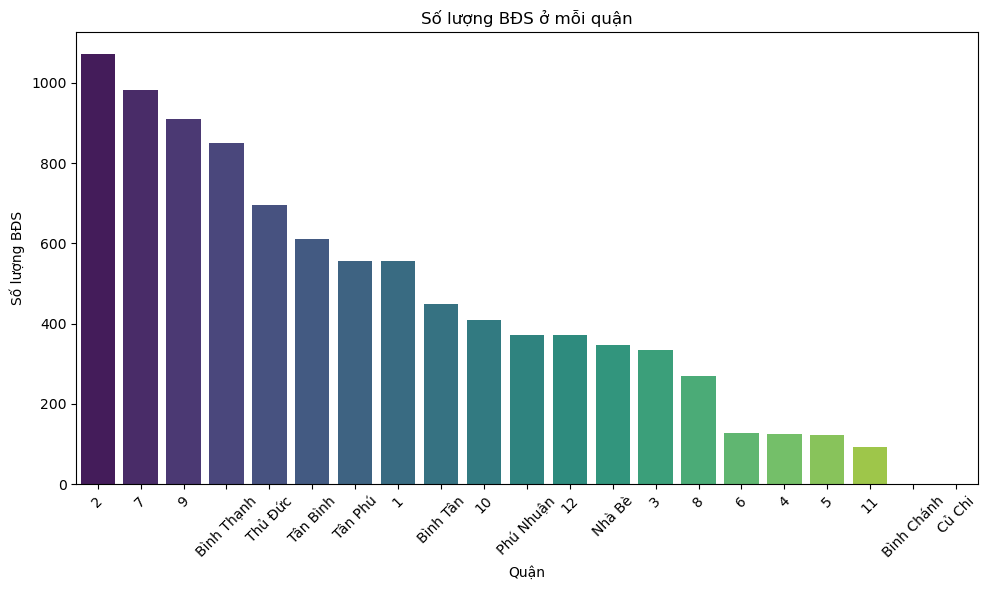

In [80]:
# Đếm số lượng BĐS trong mỗi quận
district_counts = unduplicated_data['Quận'].value_counts().reset_index()
district_counts.columns = ['Quận', 'Số lượng BĐS']

# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=district_counts, x='Quận', y='Số lượng BĐS', palette='viridis')
plt.title('Số lượng BĐS ở mỗi quận')
plt.xlabel('Quận')
plt.ylabel('Số lượng BĐS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## SỰ PHÂN BỔ VỀ GIÁ TRỊ BDS

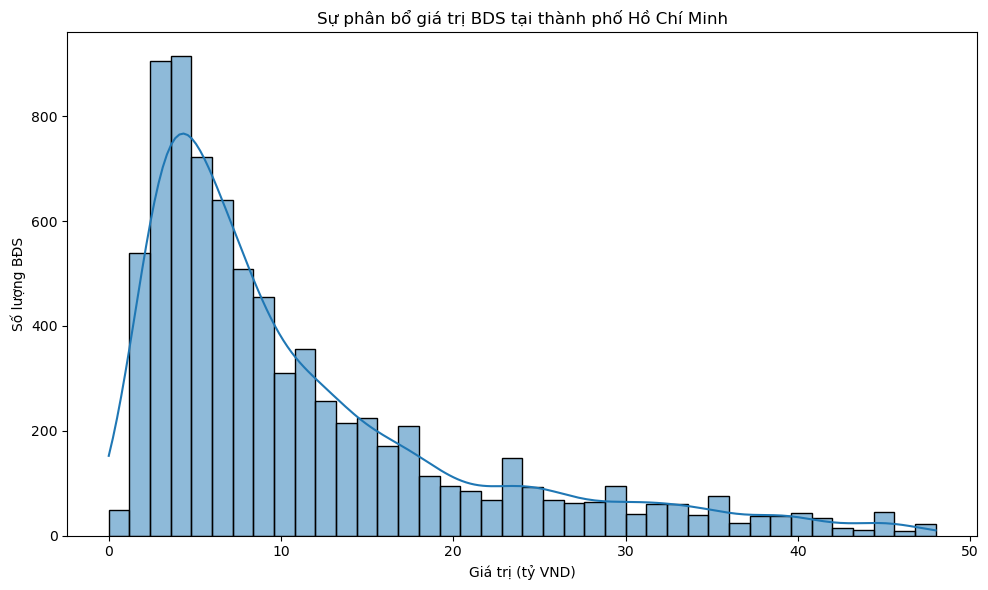

In [81]:


# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_outliers, x="Giá", bins=40, kde=True)
plt.title('Sự phân bổ giá trị BDS tại thành phố Hồ Chí Minh')
plt.xlabel('Giá trị (tỷ VND)')
plt.ylabel('Số lượng BĐS')
plt.tight_layout()
plt.show()

## SỰ LIÊN HỆ GIỮA GIÁ TRỊ VÀ DIỆN TÍCH BDS TẠI TPHCM

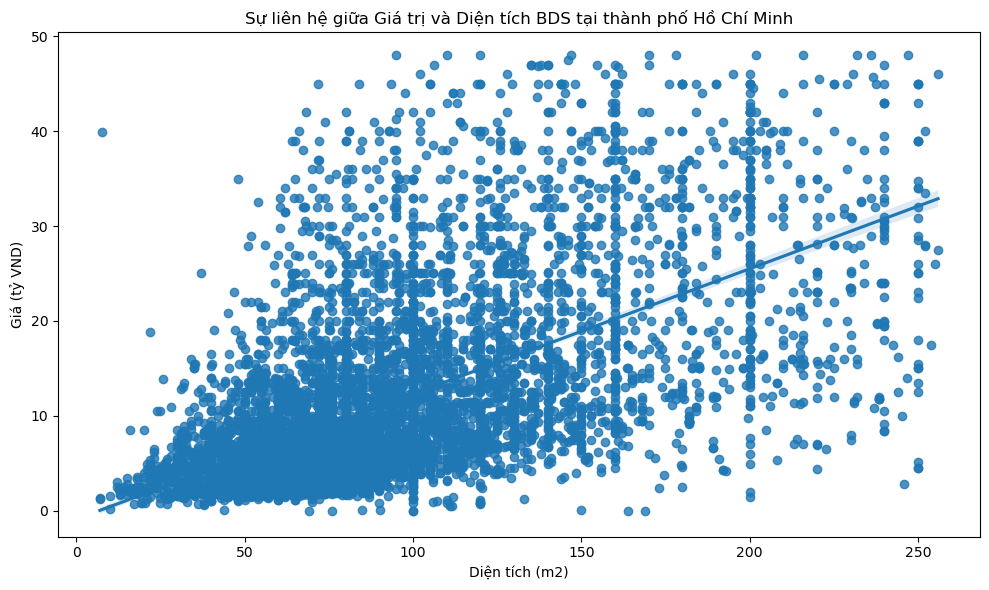

In [82]:

# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 6))
sns.regplot(data=df_no_outliers, x=df_no_outliers["Diện Tích"], y=df_no_outliers["Giá"])
plt.title('Sự liên hệ giữa Giá trị và Diện tích BDS tại thành phố Hồ Chí Minh')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá (tỷ VND)')
plt.tight_layout()
plt.show()

Nhận xét: 
- Giá và Diện tích của BDS có tính tương quan thuận với nhau.
- Biểu đồ cho thấy sự phân tán lớn chứng tỏ giá bất động sản ở mỗi khu vực khác nhau có sự khác biệt lớn.

## Sự liên hệ giữa Giá và Diện tích BDS tại một số quận ở thành phố Hồ Chí Minh

In [85]:
# Rút trích dữ liệu của một số quận để Visualization 
district_2 = df_no_outliers[df_no_outliers["Quận"] == "2"]
district_7 = df_no_outliers[df_no_outliers["Quận"] == "7"]
district_9 = df_no_outliers[df_no_outliers["Quận"] == "9"]
district_BinhThanh = df_no_outliers[df_no_outliers["Quận"] == "Bình Thạnh"]

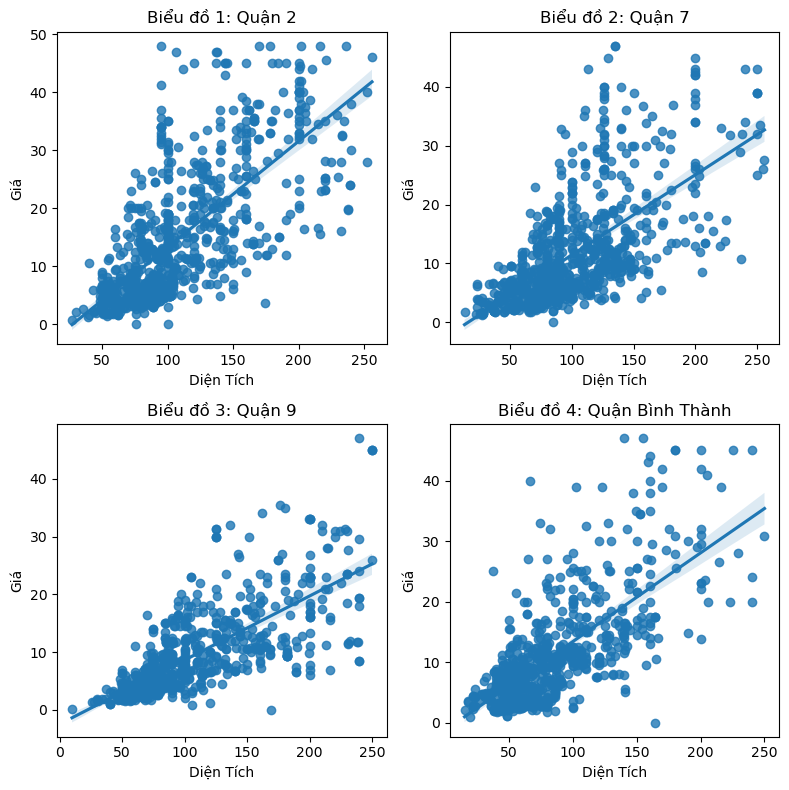

In [ ]:
datasets = [district_2, district_7, district_9, district_BinhThanh]
district_names = ["Quận 2", "Quận 7", "Quận 9", "Quận Bình Thạnh"]
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 4, n_rows * 4))

for r in range(n_rows):
    for c in range(n_cols):
        i = r *  n_cols + c
        if i < len(datasets):
            ax_i = ax[r, c]
            sns.regplot(data=datasets[i], x=datasets[i]["Diện Tích"], y=datasets[i]["Giá"], ax=ax_i)
            ax_i.set_title(f"Biểu đồ {i + 1}: {district_names[i]}")
plt.tight_layout()
plt.show()


In [87]:
num_devs = unduplicated_data["Chủ Đầu Tư"].nunique()
num_devs

189

#### Có tổng số 189 nhà đầu tư BDS khác nhau trong tập dữ liệu